# **Hand Written Digit Prediction-Classification Analysis**

**Objective-** The digits dataset consists of 8×8 pixel image of digits. The image attribute of the dataset store 8×8 arrays of grayscale values for each image. We will use these arrays to visualize attribute of the dataset stores the digit each image represents

## **Data Source**

Data source for this project is sklearn dataset module named as load_digits

## **Import Library**

In [1]:
import  pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [44]:
import seaborn as sns

## **Import Data**

In [41]:
from sklearn.datasets import load_digits

In [42]:
from sklearn.decomposition import PCA

In [6]:
df=load_digits()

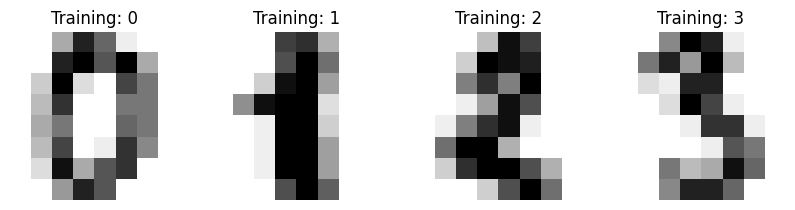

In [7]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax ,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training: %i" % label)

## **Describe Data**

The dataset loaded using `load_digits` from scikit-learn is known as the "Digits dataset." It consists of 8x8 pixel images of handwritten digits (0 through 9). Each image is represented as an 8x8 grid of grayscale values, making it a total of 64 features. The dataset is commonly used for digit recognition tasks, classification, and machine learning exercises. It serves as a popular benchmark dataset for testing various machine learning algorithms' performance in recognizing and classifying handwritten digits.

## **Data Visualization**

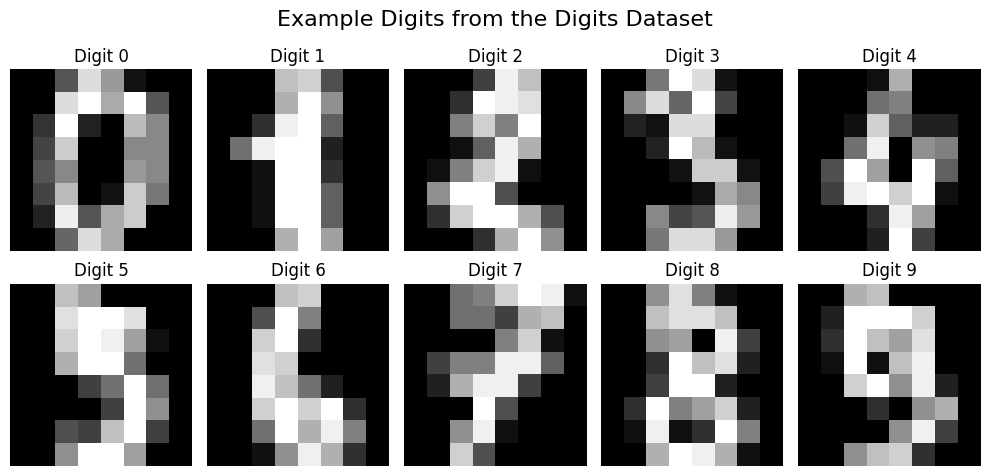

In [37]:
# Load the Digits dataset
digits = load_digits()

# Create a figure to display the digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
plt.suptitle("Example Digits from the Digits Dataset", fontsize=16)

# Plot a few digits
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

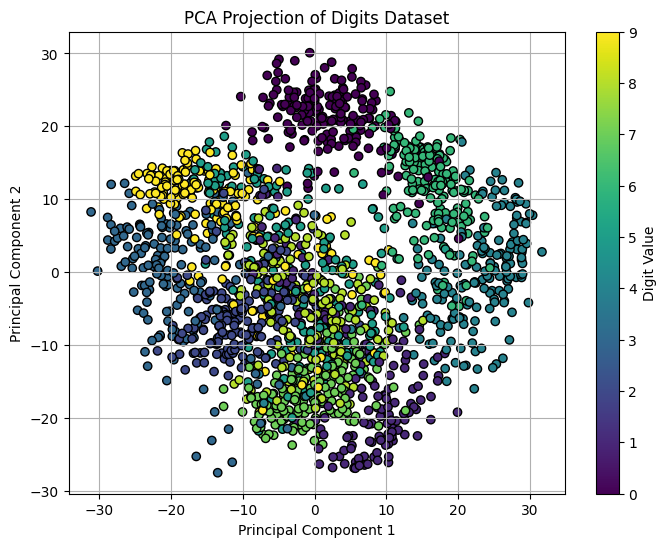

In [43]:
# Load the Digits dataset
digits = load_digits()

# Reduce dimensionality using PCA to 2 components for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(digits.data)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=digits.target, cmap='viridis', edgecolor='k')
plt.colorbar(label='Digit Value', ticks=range(10))
plt.title("PCA Projection of Digits Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


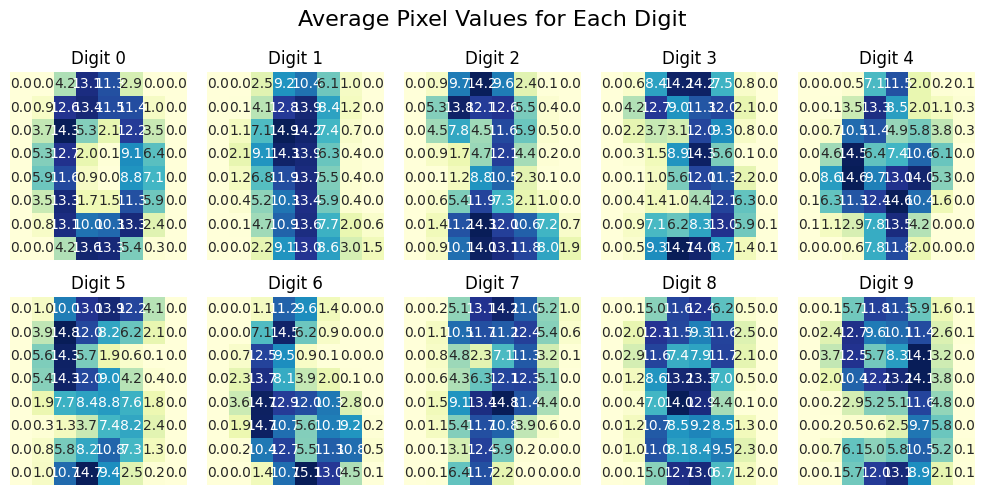

In [45]:

# Load the Digits dataset
digits = load_digits()

# Calculate the average pixel values for each digit
average_digits = []
for digit in range(10):
    digit_images = digits.data[digits.target == digit]
    average_digit = np.mean(digit_images, axis=0)
    average_digits.append(average_digit)

# Create a heatmap to visualize the average pixel values
plt.figure(figsize=(10, 5))
plt.suptitle("Average Pixel Values for Each Digit", fontsize=16)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    sns.heatmap(average_digits[i].reshape(8, 8), cmap='YlGnBu', annot=True, cbar=False, fmt='.1f')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [13]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

In [17]:
data.min()

0.0

In [18]:
data.max()

16.0

In [19]:
data=data/16

In [20]:
data.min()

0.0

In [21]:
data.max()

1.0

In [22]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Define Target Variable (y) and Feature Variables (X)**

In the Digits dataset, the target variable (y) represents the labels indicating the handwritten digit classes (0 through 9) for each image, while the feature variables (X) consist of the pixel values from the 8x8 grayscale images of these digits. The target variable (y) serves as the ground truth for supervised learning tasks, guiding the model in classifying and recognizing the handwritten digits based on the pixel values provided by the feature variables (X).

## **Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [26]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf= RandomForestClassifier()

In [29]:
rf.fit(X_train,y_train)

RandomForestClassifier()

## **Model Evaluation**

In [30]:
y_pred=rf.predict(X_test)

In [31]:
y_pred

array([2, 3, 6, 0, 7, 4, 9, 2, 4, 7, 6, 1, 6, 0, 9, 3, 1, 1, 7, 2, 1, 2,
       3, 9, 2, 7, 4, 4, 9, 5, 8, 2, 0, 8, 1, 6, 4, 4, 8, 2, 0, 5, 6, 3,
       5, 5, 7, 8, 2, 9, 1, 1, 3, 1, 1, 4, 7, 8, 9, 6, 6, 5, 3, 8, 6, 5,
       2, 5, 8, 0, 5, 8, 5, 9, 8, 8, 9, 8, 3, 7, 1, 6, 1, 6, 9, 6, 9, 4,
       8, 0, 3, 8, 7, 4, 9, 0, 8, 4, 3, 1, 1, 6, 9, 7, 1, 7, 8, 9, 8, 2,
       5, 9, 1, 5, 6, 4, 5, 8, 3, 0, 8, 1, 6, 9, 3, 4, 6, 8, 0, 8, 1, 6,
       2, 1, 3, 1, 8, 3, 7, 2, 9, 9, 5, 3, 8, 7, 6, 1, 2, 4, 4, 7, 4, 0,
       7, 2, 3, 5, 3, 5, 7, 2, 2, 9, 8, 6, 4, 2, 0, 8, 0, 5, 2, 1, 8, 5,
       6, 5, 5, 1, 4, 1, 3, 1, 9, 4, 7, 1, 4, 6, 8, 1, 0, 9, 8, 9, 9, 1,
       8, 7, 7, 6, 6, 0, 2, 5, 3, 4, 1, 8, 7, 0, 0, 5, 3, 3, 0, 1, 0, 6,
       4, 4, 6, 1, 7, 0, 8, 5, 2, 1, 7, 2, 5, 4, 4, 6, 1, 3, 6, 9, 8, 2,
       8, 2, 8, 1, 4, 6, 6, 2, 8, 1, 3, 8, 6, 5, 8, 5, 7, 1, 7, 2, 6, 3,
       6, 7, 3, 6, 9, 5, 4, 4, 2, 7, 0, 3, 0, 7, 8, 2, 4, 3, 1, 2, 1, 1,
       8, 1, 1, 8, 1, 7, 7, 5, 2, 4, 9, 0, 2, 2, 4,

## **Prediction**

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(y_test,y_pred)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 44,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 50,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 52,  1,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  1, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  2],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 61,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 47]])

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       0.92      1.00      0.96        60
           2       1.00      0.98      0.99        53
           3       0.98      0.96      0.97        46
           4       0.98      0.96      0.97        52
           5       0.96      0.95      0.95        55
           6       0.98      0.94      0.96        54
           7       0.97      0.97      0.97        61
           8       0.98      0.95      0.97        64
           9       0.92      0.94      0.93        50

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



## **Explaination**

This project centers around developing a robust machine learning-based digit recognition system, utilizing the well-known Digits dataset. The dataset comprises 8x8 pixel images of handwritten digits (0-9), with each image's pixel values serving as feature variables (X) and the corresponding digit labels as target variables (y). The primary objective is to train a model that can accurately classify and recognize these digits, thereby enabling a wide range of applications, including automated digit-based tasks and optical character recognition (OCR).

The project encompasses various key steps, including data preprocessing, model selection, hyperparameter optimization, and rigorous evaluation. Model interpretability and performance metrics like accuracy, precision, and recall play a crucial role in assessing and enhancing the system's effectiveness. By building an efficient and precise digit recognition system, this project aims to provide a valuable tool for automating tasks that involve reading and understanding handwritten digits in diverse contexts, from finance to document processing.